### Cifar10 Dataset with yoloV5

In [ ]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt

In [8]:
import torch
import os
print(f'using torch{torch.__version__}({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else "cpu"})')

using torch1.13.1+cu116(Tesla T4)


In [2]:
# train the yoloV5 in cifar10 dataset with 5 epochs and 128 batch
!python classify/train.py --model yolov5s-cls.pt --data cifar10 --epochs 5 --img 224 --batch 128

classify/train: model=yolov5s-cls.pt, data=cifar10, epochs=5, batch_size=128, imgsz=224, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=True, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
2023-03-13 05:28:58.221173: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 05:28:59.073823: W tensorflow/compiler/xla/stream_executor/platform/defau

# Predict

In [16]:
# download the image and save it to data/images/
!wget https://c0.wallpaperflare.com/preview/814/948/832/de6l8nfk6nqltrackcl9liu6ss.jpg

--2023-03-13 06:04:38--  https://c0.wallpaperflare.com/preview/814/948/832/de6l8nfk6nqltrackcl9liu6ss.jpg
Resolving c0.wallpaperflare.com (c0.wallpaperflare.com)... 104.21.235.72, 104.21.235.71, 2606:4700:3038::6815:eb47, ...
Connecting to c0.wallpaperflare.com (c0.wallpaperflare.com)|104.21.235.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95943 (94K) [image/jpeg]
Saving to: ‘de6l8nfk6nqltrackcl9liu6ss.jpg’

de6l8nfk6nqltrackcl 100%[===================>]  93.69K  --.-KB/s    in 0.1s    

2023-03-13 06:04:40 (925 KB/s) - ‘de6l8nfk6nqltrackcl9liu6ss.jpg’ saved [95943/95943]



In [12]:
!python classify/predict.py --weights yolov5s-cls.pt --data data/images/

classify/predict: weights=['yolov5s-cls.pt'], source=data/images, data=data/images/, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
image 1/3 /content/yolov5/data/images/1.jpg: 224x224 baseball player 0.87, baseball 0.12, soccer ball 0.00, football helmet 0.00, volleyball 0.00, 3.9ms
image 2/3 /content/yolov5/data/images/bus.jpg: 224x224 minibus 0.39, police van 0.24, amphibious vehicle 0.05, recreational vehicle 0.04, trolleybus 0.03, 5.8ms
image 3/3 /content/yolov5/data/images/zidane.jpg: 224x224 suit 0.38, bow tie 0.19, bridegroom 0.18, rugby ball 0.04, stage 0.02, 4.3ms
Speed: 0.3ms pre-process, 4.6ms inference, 0.1ms NMS per image at shape (1, 3, 2

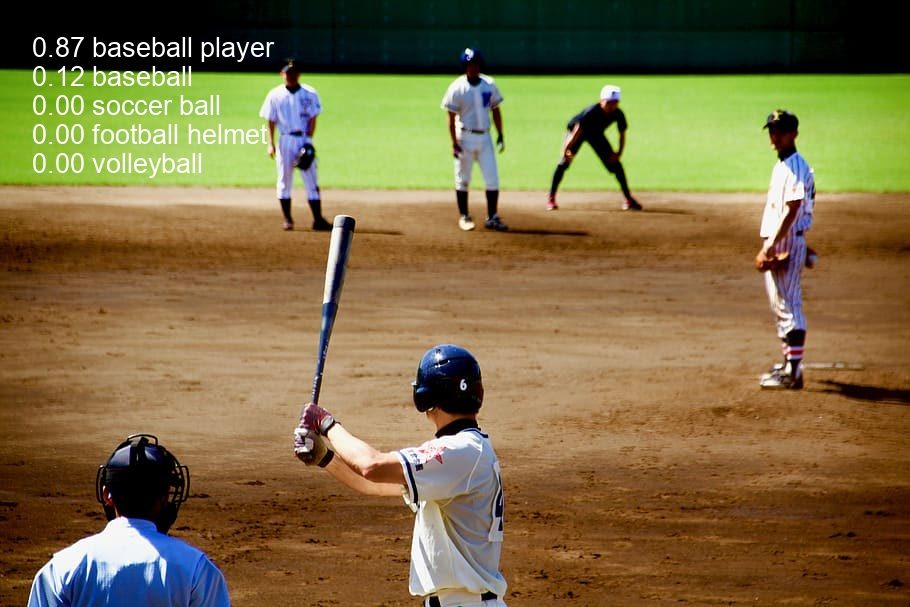

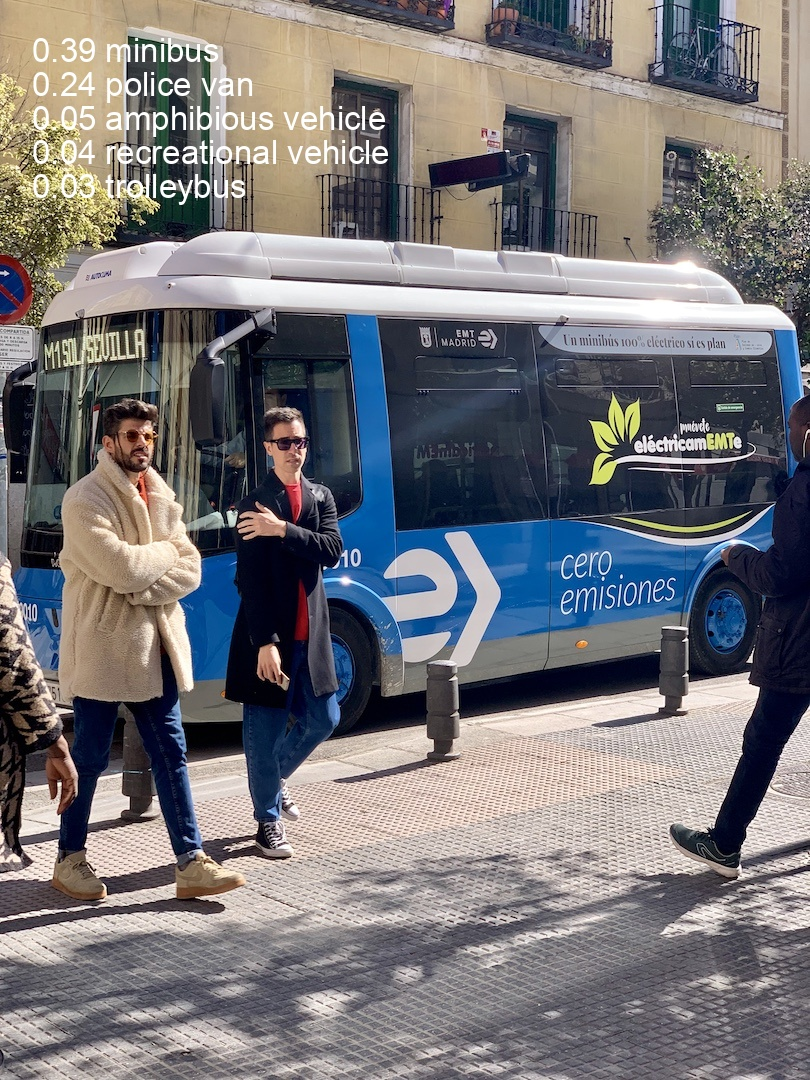

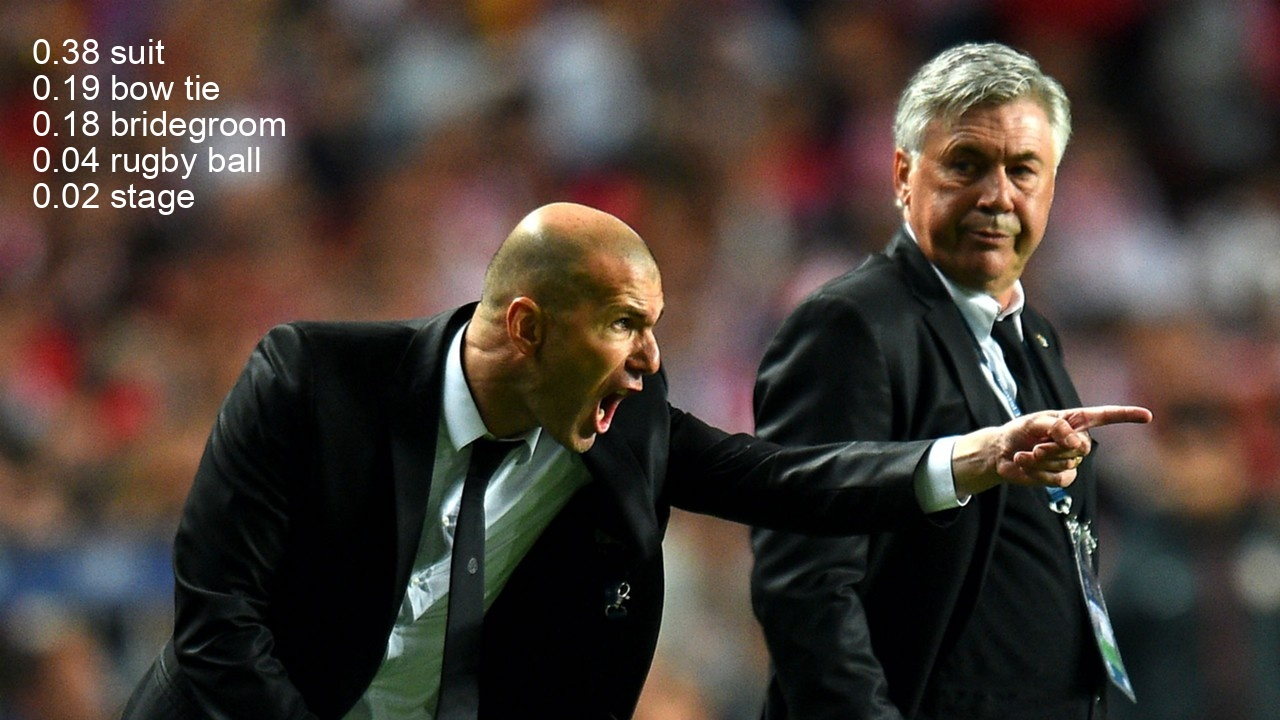

In [14]:
import glob
import cv2
folder='/content/yolov5/runs/predict-cls/exp4/*.jpg'
i=0
from IPython.display import Image,clear_output
for images in glob.glob(folder):
  i+=1
  if i<10:
    display(Image(filename=images))
    print('\n')